In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_parquet('df_clima_sp.parquet') 
df

,preciptacao,pressao_atm,pressao_atm_max,pressao_atm_min,temperatura,temperatura_orvalho,temperatura_max,temperatura_min,temperatura_orvalho_max,temperatura_orvalho_min,umidade_rel_ar_max,umidade_rel_ar_min,umidade_rel_ar,velocidade_vento,data
0,0.0,925.6,925.6,925.2,22.8,16.9,23.0,22.7,17.3,16.8,71.0,68.0,69.0,2.6,2019-01-01 00:00:00
1,0.0,926.0,926.0,925.6,22.3,16.8,22.8,22.3,16.9,16.4,71.0,68.0,71.0,2.5,2019-01-01 01:00:00
2,0.0,925.5,926.0,925.5,22.1,17.0,22.3,22.1,17.1,16.8,73.0,71.0,73.0,2.1,2019-01-01 02:00:00
3,0.0,924.7,925.5,924.7,21.6,17.1,22.1,21.6,17.2,17.0,76.0,73.0,76.0,1.6,2019-01-01 03:00:00
4,0.0,924.4,924.7,924.4,21.6,17.1,21.6,21.5,17.2,17.1,76.0,75.0,76.0,2.2,2019-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7291,1.6,923.2,923.3,922.5,20.9,19.1,23.9,20.9,20.9,19.0,90.0,80.0,90.0,2.6,2023-10-31 19:00:00
7292,0.2,922.8,923.3,922.5,20.7,19.2,20.8,20.5,19.2,18.6,91.0,88.0,91.0,2.5,2023-10-31 20:00:00
7293,0.0,923.4,923.6,922.8,20.6,19.4,21.0,20.4,19.7,19.2,94.0,91.0,93.0,0.7,2023-10-31 21:00:00
7294,0.0,923.8,923.9,923.4,20.2,19.2,20.7,20.2,19.6,19.1,94.0,92.0,94.0,0.8,2023-10-31 22:00:00


In [26]:
df.isnull().sum()

preciptacao                1211
pressao_atm                 293
pressao_atm_max             296
pressao_atm_min             296
temperatura                 293
temperatura_orvalho         670
temperatura_max             297
temperatura_min             296
temperatura_orvalho_max     668
temperatura_orvalho_min     675
umidade_rel_ar_max          663
umidade_rel_ar_min          663
umidade_rel_ar              663
velocidade_vento            983
data                          0
dtype: int64

In [4]:
df = df.ffill()
df.isnull().sum()

preciptacao                0
pressao_atm                0
pressao_atm_max            0
pressao_atm_min            0
temperatura                0
temperatura_orvalho        0
temperatura_max            0
temperatura_min            0
temperatura_orvalho_max    0
temperatura_orvalho_min    0
umidade_rel_ar_max         0
umidade_rel_ar_min         0
umidade_rel_ar             0
velocidade_vento           0
data                       0
dtype: int64

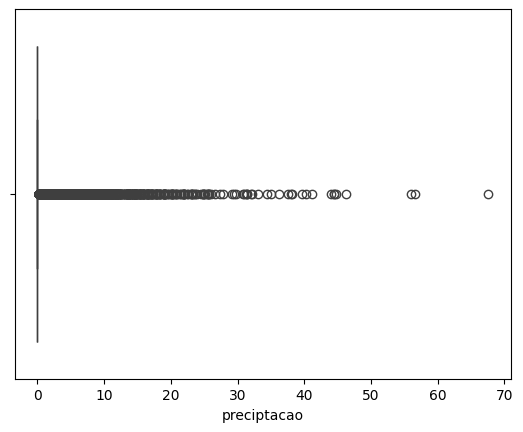

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criando um box plot
sns.boxplot(x=df['preciptacao'])
plt.show()

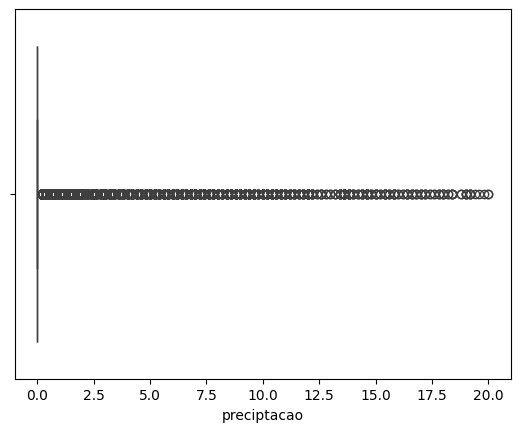

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt


lower_limit = 0  # Defina o limite inferior
upper_limit = 20  # Defina o limite superior

df_no_outliers = df[(df['preciptacao'] >= lower_limit) & (df['preciptacao'] <= upper_limit)]

sns.boxplot(x=df_no_outliers['preciptacao'])
plt.show()

C:\Users\eduardo.oliveira\AppData\Local\Temp\ipykernel_2492\1513034151.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Mean Squared Error: 1.0093315432721481
Root Mean Squared Error: 1.0046549374149056
Variância da Precipitação nos Dados de Teste: preciptacao    1.344884
dtype: float64
R-squared (R2): 0.24950270774994487


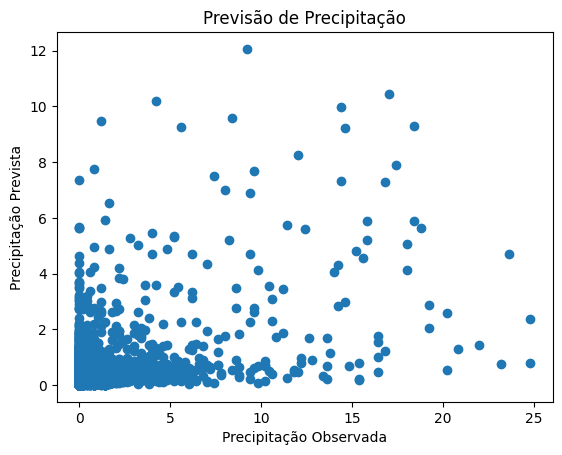

In [51]:
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


# Escolher as variáveis de entrada (features) e a variável de saída (target)
X = df_no_outliers[['pressao_atm','pressao_atm_max','pressao_atm_min','temperatura','temperatura_orvalho',
                    'temperatura_max','temperatura_min','temperatura_orvalho_max','temperatura_orvalho_min',
                    'umidade_rel_ar_max','umidade_rel_ar_min','umidade_rel_ar',
                    'velocidade_vento']]

y = df_no_outliers[['preciptacao']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
model = RandomForestRegressor(max_depth= 10, min_samples_leaf= 10, min_samples_split= 25, n_estimators= 50)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

variance = np.var(y_test)
print(f'Variância da Precipitação nos Dados de Teste: {variance}')


r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2}')

# Visualizar as previsões
plt.scatter(y_test, y_pred)
plt.xlabel("Precipitação Observada")
plt.ylabel("Precipitação Prevista")
plt.title("Previsão de Precipitação")
plt.show()

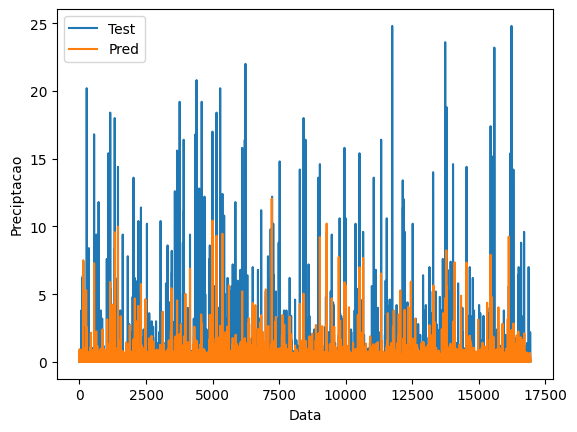

In [53]:
plt.plot([i for i in range(0,len(y_test))], y_test,label='Test')
plt.plot([i for i in range(0,len(y_test))], y_pred, label='Pred')

plt.xlabel('Data')
plt.ylabel('Preciptacao')
plt.legend()
plt.show()

Mean Squared Error: 0.7093601530066752
Root Mean Squared Error: 0.84223521240012
Variância da Precipitação nos Dados de Teste: preciptacao    0.9887
dtype: float64
R-squared (R2): 0.28253273107687327


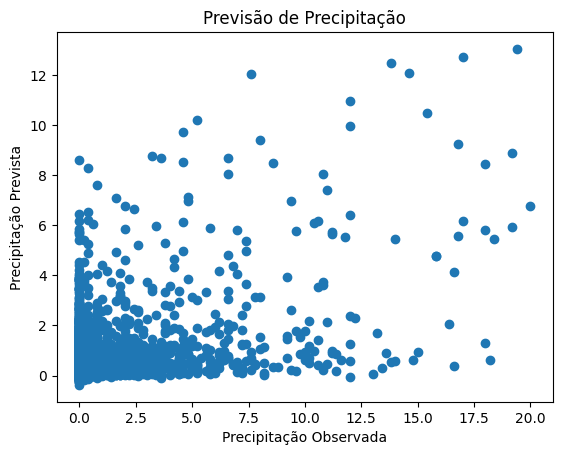

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


X = df_no_outliers[['pressao_atm','pressao_atm_max','pressao_atm_min','temperatura','temperatura_orvalho',
                    'temperatura_max','temperatura_min','temperatura_orvalho_max','temperatura_orvalho_min',
                    'umidade_rel_ar_max','umidade_rel_ar_min','umidade_rel_ar',
                    'velocidade_vento']]

y = df_no_outliers[['preciptacao']]

# Divida os dados em treino e teste
# train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Crie e treine o modelo XGBoost
model = XGBRegressor(objective='reg:squarederror', n_estimators=60, learning_rate=0.1, max_depth=12)
model.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avalie o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

variance = np.var(y_test)
print(f'Variância da Precipitação nos Dados de Teste: {variance}')


r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2}')

# Visualizar as previsões
plt.scatter(y_test, y_pred)
plt.xlabel("Precipitação Observada")
plt.ylabel("Precipitação Prevista")
plt.title("Previsão de Precipitação")
plt.show()

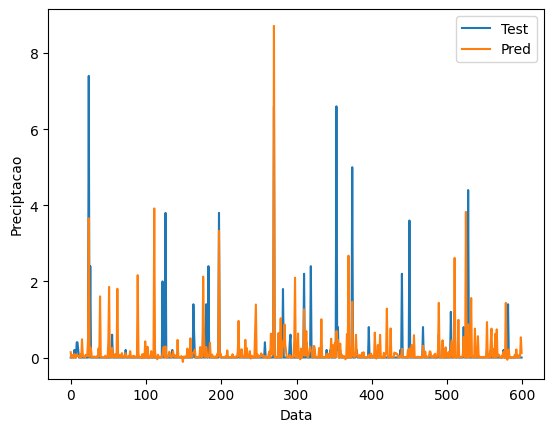

In [83]:
plt.plot([i for i in range(0,len(y_test[0:600]))], y_test[0:600],label='Test')
plt.plot([i for i in range(0,len(y_pred[0:600]))], y_pred[0:600], label='Pred')

plt.xlabel('Data')
plt.ylabel('Preciptacao')
plt.legend()
plt.show()

In [ ]:
Bayesian optimization